In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

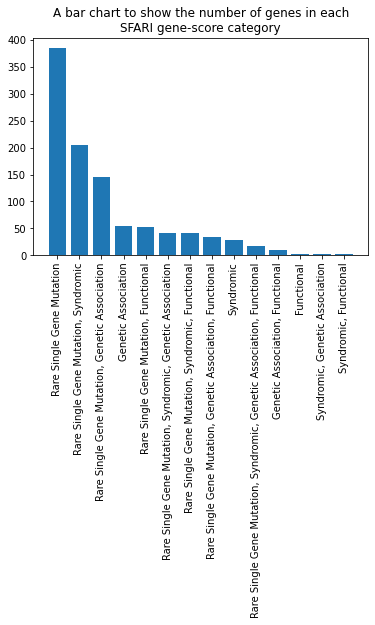

In [3]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.bar(gene_cat_vals, gene_cat_counts)
plt.xticks(rotation=90)
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

# task 2

In [25]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [20]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [30]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i])
    print()

780
status                                                               9
gene-symbol                                                      SCN1A
gene-name            sodium channel, voltage-gated, type I, alpha s...
ensembl-id                                             ENSG00000144285
chromosome                                                           2
genetic-category     Rare Single Gene Mutation, Syndromic, Genetic ...
gene-score                                                         1.0
syndromic                                                            1
number-of-reports                                                   68
Name: 780, dtype: object

789
status                                                               9
gene-symbol                                                      SCN2A
gene-name            sodium channel, voltage-gated, type II, alpha ...
ensembl-id                                             ENSG00000136531
chromosome                                 

# task 3

# task 4

In [31]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [76]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

[7971 7995 7999 8003 8007 8011 8015 8019 8023 8027 8031 8035 8039 8043
 8047 8051 8055 8059 8063 8067 8071 8075 8079 8083]
[7971.5 7995.5 7999.5 8003.5 8007.5 8011.5 8015.5 8019.5 8023.5 8027.5
 8031.5 8035.5 8039.5 8043.5 8047.5 8051.5 8055.5 8059.5 8063.5 8067.5
 8071.5 8075.5 8079.5 8083.5]
[7972 7996 8000 8004 8008 8012 8016 8020 8024 8028 8032 8036 8040 8044
 8048 8052 8056 8060 8064 8068 8072 8076 8080 8084]
[7972.5 7996.5 8000.5 8004.5 8008.5 8012.5 8016.5 8020.5 8024.5 8028.5
 8032.5 8036.5 8040.5 8044.5 8048.5 8052.5 8056.5 8060.5 8064.5 8068.5
 8072.5 8076.5 8080.5 8084.5]
[7973 7997 8001 8005 8009 8013 8017 8021 8025 8029 8033 8037 8041 8045
 8049 8053 8057 8061 8065 8069 8073 8077 8081 8085]


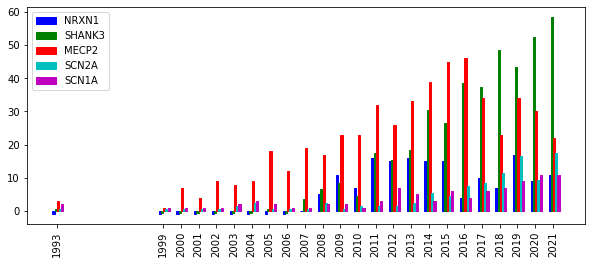

In [132]:
ax = plt.subplot()
offsets = [-1, -0.5, 0, 0.5, 1]
colours = ["b", "g", "r", "c", "m"]
new_years = years*4
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=0.5, color=colours[f], edgecolor=colours[f], align="center", label=genes[f])
    print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

# task 5